In [81]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 

In [82]:
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
import tensorflow.keras as keras

Нейронная сеть AlexNet.

In [83]:
# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test)=fashion_mnist.load_data()

In [84]:
# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [85]:
# нормализация данных [0, 1]
x_train /= 255 
x_test /= 255 

In [86]:
# трансформация лейблов в one-hot encoding
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [87]:
# инициализация пустой модели
model = Sequential()

In [88]:

model.add(layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28,1), padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(layers.Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(layers.Conv2D(192, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))
model.add(layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))
model.add(layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))


# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model.add(layers.Flatten())

# полносвязный слой
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dense(2048, activation='relu'))

# выходной слой с функцией активации softmax
model.add(layers.Dense(10, activation='softmax'))

In [90]:
# компилияция модели
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

In [91]:
hist = model.fit(x=x_train,y=y_train, epochs=2, batch_size=32, validation_data=(x_test, y_test), verbose=1)

test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/2
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4578 - accuracy: 0.8308 - val_loss: 0.3410 - val_accuracy: 0.8742
Epoch 2/2
313/313 [==============================] - 1s 4ms/step - loss: 0.2738 - accuracy: 0.8985
Test loss 0.2738, accuracy 89.85%


In [92]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 7, 7, 192)         110784    
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 7, 7, 384)         663936    
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 7, 7, 256)       

In [93]:
y_pred=model.predict(x_test)

In [94]:
import matplotlib.pyplot as plt

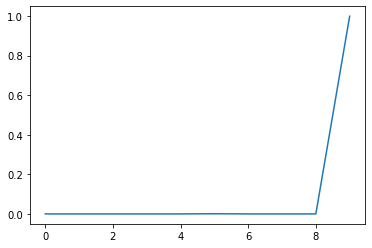

[8.4707246e-08 1.4105686e-07 7.8717835e-07 1.2325231e-07 2.8436625e-06
 9.3750440e-04 6.1825585e-07 1.8241135e-05 4.0322611e-08 9.9903959e-01]


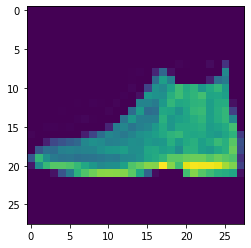

In [95]:
plt.plot(y_pred[0][:])
plt.show()
print(y_pred[0][:])
plt.imshow(x_test[0][:,:,0])
plt.show()